# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [38]:
# Dependencies
import matplotlib.pyplot as plt
import json
import requests
from scipy import stats
import pandas as pd
import random
from api_keys import weather_api_key
from scipy.stats import linregress
from sklearn import datasets

#Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

## Generate Cities List

In [39]:
# File to Load
file_to_load = "output_data/cities.csv"

# Read cities File
city_data = pd.read_csv(file_to_load)
#
#count show there are 548 cities
#
city_data.count()
#
#Get a random sample of 500 cities from the 548 cities available
indices = random.sample(list(range(1, 548)), 500)



### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [41]:

#
#Create a new dataframe containing info we will need for analysing and plotting later
#
city_weather_df = pd.DataFrame({'City': [],
                                'Country':[],
                                'temperature': [], 
                                'humidity': [], 
                                'cloudiness': [], 
                                'wind_speed': [], 
                                'latitude': [],
                                'longtitude': []
                                })
for x in range(len(indices)):
    city=city_data.iloc[x]
    #
    #Build the url to get the required data
    #
    query_url = url + "appid=" + weather_api_key + "&q=" + city["City"]+"&units=metric"
    # Get the weather for each city using the api
    weather_response = requests.get(query_url)
    weather_json = weather_response.json()
    #
    # Store the required weather elements for future plotting
    #
    temperature=weather_json["main"]["temp"]
    humidity=weather_json["main"]["humidity"]
    cloudiness=weather_json["clouds"]["all"]
    wind_speed=weather_json["wind"]["speed"]
    lat=weather_json["coord"]["lat"]
    lon=weather_json["coord"]["lon"]
    country=weather_json["sys"]["country"]
    city_weather_df=city_weather_df.append({
                            'City': city["City"],
                            'Country': country,
                            'temperature': temperature, 
                            'humidity': humidity, 
                            'cloudiness': cloudiness, 
                            'wind_speed':wind_speed, 
                            'latitude': lat,
                            'longtitude':lon
                            }, ignore_index=True)

    #print(json.dumps(weather_json, indent=4, sort_keys=True))
    #city=city["City"]
    # Save post's JSON
    #weather_json.append(post_response.json())
    city=city["City"]                    
    print(f"Making request number: {x} for ID: {indices[x]} City {city} country {country}" )


Making request number: 0 for ID: 425 City ostrovnoy country RU
Making request number: 1 for ID: 332 City mahebourg country MU
Making request number: 2 for ID: 443 City qaanaaq country GL
Making request number: 3 for ID: 40 City zhuhai country CN
Making request number: 4 for ID: 271 City cape town country ZA
Making request number: 5 for ID: 322 City atuona country PF
Making request number: 6 for ID: 445 City flinders country AU
Making request number: 7 for ID: 75 City opuwo country NA
Making request number: 8 for ID: 358 City tiksi country RU
Making request number: 9 for ID: 388 City pushkinskiye gory country RU
Making request number: 10 for ID: 114 City aykhal country RU
Making request number: 11 for ID: 230 City castro country BR
Making request number: 12 for ID: 77 City avarua country CK
Making request number: 13 for ID: 471 City saskylakh country RU
Making request number: 14 for ID: 489 City constitucion country CL
Making request number: 15 for ID: 519 City albany country US
Making 

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [23]:
#Check on the output received to examine indexes and keywords
print(json.dumps(weather_json, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 17
    },
    "cod": 200,
    "coord": {
        "lat": 19.35,
        "lon": -90.7167
    },
    "dt": 1650778736,
    "id": 3531177,
    "main": {
        "feels_like": 25.93,
        "grnd_level": 1011,
        "humidity": 72,
        "pressure": 1012,
        "sea_level": 1012,
        "temp": 25.45,
        "temp_max": 25.45,
        "temp_min": 25.45
    },
    "name": "Champot\u00f3n",
    "sys": {
        "country": "MX",
        "sunrise": 1650800321,
        "sunset": 1650846176
    },
    "timezone": -18000,
    "visibility": 10000,
    "weather": [
        {
            "description": "few clouds",
            "icon": "02n",
            "id": 801,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 110,
        "gust": 11,
        "speed": 5.29
    }
}


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [42]:
city_weather_df.to_csv("output_data/cities_output.csv")
city_weather_df

,City,Country,temperature,humidity,cloudiness,wind_speed,latitude,longtitude
0,ostrovnoy,RU,0.96,95.0,97.0,6.86,68.0531,39.5131
1,mahebourg,MU,25.16,73.0,40.0,7.20,-20.4081,57.7000
2,qaanaaq,GL,-20.91,76.0,33.0,3.64,77.4840,-69.3632
3,zhuhai,CN,27.65,89.0,40.0,3.09,22.2769,113.5678
4,cape town,ZA,11.34,79.0,20.0,1.54,-33.9258,18.4232
...,...,...,...,...,...,...,...,...
495,fuxin,CN,21.80,17.0,100.0,2.92,42.0156,121.6589
496,chernaya kholunitsa,RU,7.95,73.0,100.0,1.87,58.8511,51.7154
497,havelock,US,17.45,86.0,4.0,2.53,34.8791,-76.9013
498,traverse city,US,19.99,57.0,100.0,7.25,44.7631,-85.6206


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [43]:
#Create a new data frame of cities with humidity above 100%. Have included = 100% do not want to miss any data
cities_high_humidity=city_weather_df.loc[city_weather_df["humidity"]>=100, :]
cities_high_humidity.shape  # Looks like we have no cities with humiidty greater than 100% from our random sample
cities_high_humidity

,City,Country,temperature,humidity,cloudiness,wind_speed,latitude,longtitude
271,coihaique,CL,3.97,100.0,100.0,1.54,-45.5752,-72.0662
347,tigil,RU,1.25,100.0,100.0,2.15,57.8000,158.6667
437,sioux lookout,CA,1.58,100.0,100.0,4.03,50.1001,-91.9170


In [44]:
#Create a new data frame of cities with humidity below 100%
cities_low_humidity=city_weather_df.loc[city_weather_df["humidity"]<100, :]
cities_low_humidity.shape # we have 500 cities with humiidty less than 100 from our random sample
cities_low_humidity

,City,Country,temperature,humidity,cloudiness,wind_speed,latitude,longtitude
0,ostrovnoy,RU,0.96,95.0,97.0,6.86,68.0531,39.5131
1,mahebourg,MU,25.16,73.0,40.0,7.20,-20.4081,57.7000
2,qaanaaq,GL,-20.91,76.0,33.0,3.64,77.4840,-69.3632
3,zhuhai,CN,27.65,89.0,40.0,3.09,22.2769,113.5678
4,cape town,ZA,11.34,79.0,20.0,1.54,-33.9258,18.4232
...,...,...,...,...,...,...,...,...
495,fuxin,CN,21.80,17.0,100.0,2.92,42.0156,121.6589
496,chernaya kholunitsa,RU,7.95,73.0,100.0,1.87,58.8511,51.7154
497,havelock,US,17.45,86.0,4.0,2.53,34.8791,-76.9013
498,traverse city,US,19.99,57.0,100.0,7.25,44.7631,-85.6206


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [45]:
cities_high_humidity=city_weather_df.loc[city_weather_df["humidity"]>=100, :]
cities_low_humidity.shape
cities_high_humidity

,City,Country,temperature,humidity,cloudiness,wind_speed,latitude,longtitude
271,coihaique,CL,3.97,100.0,100.0,1.54,-45.5752,-72.0662
347,tigil,RU,1.25,100.0,100.0,2.15,57.8000,158.6667
437,sioux lookout,CA,1.58,100.0,100.0,4.03,50.1001,-91.9170


In [46]:
#  Get the indices of cities that have humidity over 100%.
cities_high_humidity

,City,Country,temperature,humidity,cloudiness,wind_speed,latitude,longtitude
271,coihaique,CL,3.97,100.0,100.0,1.54,-45.5752,-72.0662
347,tigil,RU,1.25,100.0,100.0,2.15,57.8000,158.6667
437,sioux lookout,CA,1.58,100.0,100.0,4.03,50.1001,-91.9170


In [48]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
# Decided to do things differently to the instructions above. Rather than remove cities of outliers of 100% humidity
#Just create a new dataframe excluding those outliers
clean_city_data_df=cities_low_humidity
#Lets look at max and min values to help when making plots and graphs. So we know what the min and max values are
clean_city_data_df.describe()


,temperature,humidity,cloudiness,wind_speed,latitude,longtitude
count,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000
mean,15.839658,70.686117,60.503018,3.499437,19.526366,23.063497
std,11.930452,21.910330,37.945319,2.411694,33.882862,92.934061
min,-22.300000,1.000000,0.000000,0.000000,-54.800000,-175.200000
25%,7.990000,61.000000,22.000000,1.790000,-8.118100,-64.326000
50%,18.210000,75.000000,73.000000,2.920000,20.862400,25.783300
75%,25.160000,87.000000,99.000000,4.710000,48.599900,111.893500
max,41.420000,99.000000,100.000000,14.270000,78.218600,179.316700


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

The graph shows the obvious that temperatures are higher close to the equator i.e. latitude 0 deg

C:\Users\00107581\Anaconda3\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


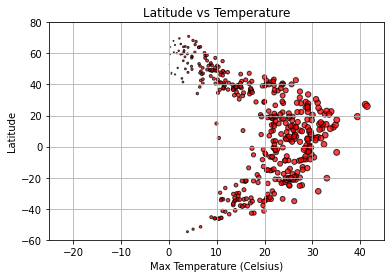

In [95]:

y_axis=clean_city_data_df["latitude"]
x_axis=clean_city_data_df["temperature"]
plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black",
            s=x_axis, alpha=0.75);
# The latitudes go from -54.8 to 78
plt.ylim(-60, 80)

# The temperature limits in our sample is -22 to 41
plt.xlim(-25,45)
#plt.hlines(-60, -20 ,10, alpha=0.25)
# Create a title, x label, and y label for our chart
plt.title("Latitude vs Temperature")
plt.xlabel("Max Temperature (Celsius)")
plt.ylabel("Latitude")
plt.grid()
#Save plot as image file
plt.savefig("Images/LatitudevMaxTemp.jpg");


## Latitude vs. Humidity Plot

Unlike temperature humidity does not seem to correlate with latitude. There can be high humidity in colder climates too. But higher humidity seems more normal than low humidity across latitudes

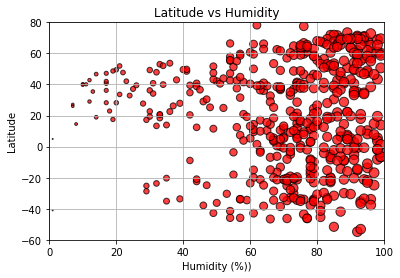

In [96]:
y_axis=clean_city_data_df["latitude"]
x_axis=clean_city_data_df["humidity"]
plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black",
            s=x_axis, alpha=0.75);
# The latitudes go from -54.8 to 78
plt.ylim(-60, 80)

# The humidity limits in our sample are 1 to 99 %
plt.xlim(0,100)

# Create a title, x label, and y label for our chart
plt.title("Latitude vs Humidity")
plt.xlabel("Humidity (%))")
plt.ylabel("Latitude")
plt.grid()
#Save plot as image file
plt.savefig("Images/LatitudevHumidity.jpg")
plt.show()


## Latitude vs. Cloudiness Plot

Like humidity cloudiness does not seem to correlate with latitude. There can be lots of clouds regardless of the latitude.

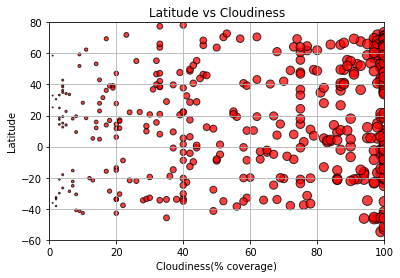

In [97]:
y_axis=clean_city_data_df["latitude"]
x_axis=clean_city_data_df["cloudiness"]
plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black",
            s=x_axis, alpha=0.75);
# The latitudes go from -54.8 to 78
plt.ylim(-60, 80)
# The cloudiness values range from 0 to 100
plt.xlim(0,100)

# Create a title, x label, and y label for our chart
plt.title("Latitude vs Cloudiness")
plt.xlabel("Cloudiness(% coverage)")
plt.ylabel("Latitude")
plt.grid()
#Save plot as image file
plt.savefig("Images/LatitudevCloudiness.jpg")
plt.show()


## Latitude vs. Wind Speed Plot

Windspeed and latitude do not seem to fit a pattern. You can get the same average windspeed no matter your latitude

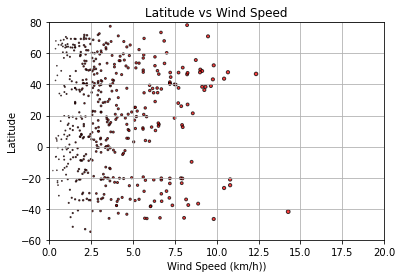

In [98]:
y_axis=clean_city_data_df["latitude"]
x_axis=clean_city_data_df["wind_speed"]
plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black",
            s=x_axis, alpha=0.75);

# The latitudes go from -54.8 to 78
plt.ylim(-60, 80)

# Wind speeds vary in our data frame from 0 to 14.3 kph
plt.xlim(0,100)
plt.ylim(-60,80)

# The x limits of our scatter plot is 0 to 20
plt.xlim(0,20)

# Create a title, x label, and y label for our chart
plt.title("Latitude vs Wind Speed")
plt.xlabel("Wind Speed (km/h))")
plt.ylabel("Latitude")
plt.grid()
#Save plot as image file
plt.savefig("Images/Latitudevwindpspeed.jpg")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

C:\Users\00107581\Anaconda3\lib\site-packages\matplotlib\collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


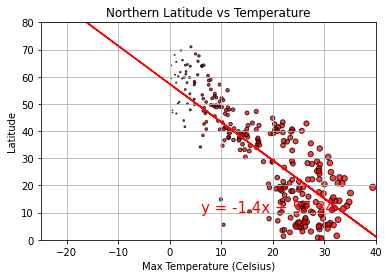

y = -1.4x + 57.34


In [100]:
# Add the linear regression equation and line to plot
northern_cities=city_weather_df.loc[city_weather_df["latitude"]>=0, :]
y_axis=northern_cities["latitude"]
x_axis=northern_cities["temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black",
            s=x_axis, alpha=0.75);

# Latitudes 0 to 80
plt.ylim(0, 80)

# Temperatures range from -22 to 41
plt.xlim(-25,40)
#plt.hlines(-60, -20 ,10, alpha=0.25)
# Create a title, x label, and y label for our chart
plt.title("Northern Latitude vs Temperature")
plt.xlabel("Max Temperature (Celsius)")
plt.ylabel("Latitude")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.plot(x_axis,regress_values,"r-")
plt.grid()

#Save plot as image file
plt.savefig("Images/NorthernLinearRegressionTempLat.jpg");
plt.show();
print(line_eq);


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

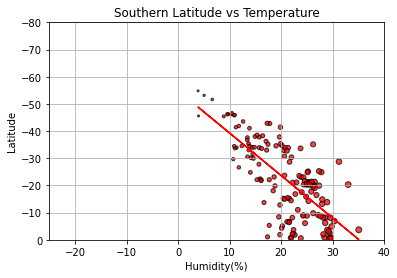

y = 1.56x + -54.89


In [101]:
#Add the linear regression equation and line to plot
southern_cities=city_weather_df.loc[city_weather_df["latitude"]<0, :]
y_axis=southern_cities["latitude"]
x_axis=southern_cities["temperature"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black",
            s=x_axis, alpha=0.75);

# Latitudes 0 to 80
plt.ylim(0, -80)

# Temperatures range from -22 to 41
plt.xlim(-25,40)
#plt.hlines(-60, -20 ,10, alpha=0.25)
# Create a title, x label, and y label for our chart
plt.title("Southern Latitude vs Temperature")
plt.xlabel("Humidity(%)")
plt.ylabel("Latitude")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.plot(x_axis,regress_values,"r-")
plt.grid()
#Save plot as image file
plt.savefig("Images/SouthernLinearRegressionTempLat.jpg")
plt.show()
print(line_eq)

Very similar graphs for Linerar regression of temperature in Northern and Southern latitudes which is not surprising. The slope of the equation is very similar. But for some reason the Northern latitudes came up with negative square roots. Otherwise A good predictor of what tempaeratures would be like at different latitudes

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

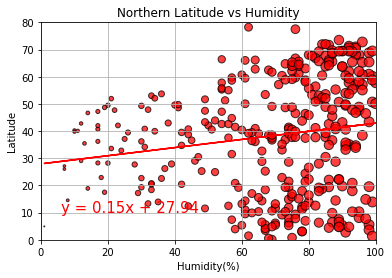

y = 0.15x + 27.94


In [102]:
# Add the linear regression equation and line to plot
#northern_cities=city_weather_df.loc[city_weather_df["latitude"]>0, :]
y_axis=northern_cities["latitude"]
x_axis=northern_cities["humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black",
            s=x_axis, alpha=0.75);
#Latitude from 0 to 80
plt.ylim(0, 80)

#Humidity is 0 to 100
plt.xlim(0,100)
#plt.hlines(-60, -20 ,10, alpha=0.25)
# Create a title, x label, and y label for our chart
plt.title("Northern Latitude vs Humidity")
plt.xlabel("Humidity(%)")
plt.ylabel("Latitude")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.plot(x_axis,regress_values,"r-")
plt.grid()
#Save plot as image file
plt.savefig("Images/NorthernLinearRegressionLatHumdity.jpg")
plt.show()
print(line_eq)

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

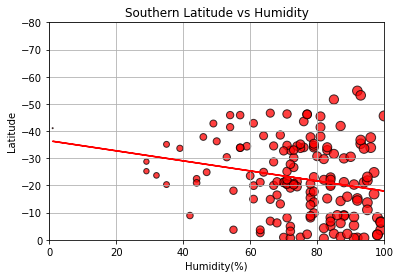

y = 0.18x + -36.43


<Figure size 432x288 with 0 Axes>

In [103]:
# Add the linear regression equation and line to plot
#northern_cities=city_weather_df.loc[city_weather_df["latitude"]>0, :]
y_axis=southern_cities["latitude"]
x_axis=southern_cities["humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black",
            s=x_axis, alpha=0.75);
            # The y limits of our scatter plot is 0 to 1
plt.ylim(0, -80)

# The x limits of our scatter plot is 0 to 100
plt.xlim(0,100)
#plt.hlines(-60, -20 ,10, alpha=0.25)
# Create a title, x label, and y label for our chart
plt.title("Southern Latitude vs Humidity")
plt.xlabel("Humidity(%)")
plt.ylabel("Latitude")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.plot(x_axis,regress_values,"r-")
plt.grid()
plt.show()
#Save plot as image file
plt.savefig("Images/SouthernLinearRegressionLatHumdity.jpg")
print(line_eq)

Very similar graphs for Linear regression of humidity in Northern and Southern latitudes which is not surprising again. The slope of the equation is very similar. A good predictor of what humidity % would be like at different latitudes

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

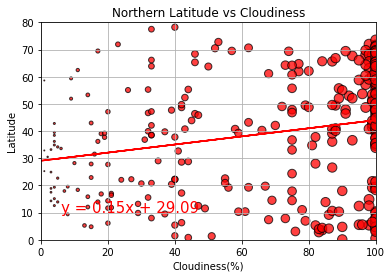

y = 0.15x + 29.09


In [104]:
# Add the linear regression equation and line to plot
#northern_cities=city_weather_df.loc[city_weather_df["latitude"]>0, :]
y_axis=northern_cities["latitude"]
x_axis=northern_cities["cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black",
            s=x_axis, alpha=0.75);
            # The y limits of our scatter plot is 0 to 1
plt.ylim(0, 80)

# The x limits of our scatter plot is 0 to 100%
plt.xlim(0,100)
#plt.hlines(-60, -20 ,10, alpha=0.25)
# Create a title, x label, and y label for our chart
plt.title("Northern Latitude vs Cloudiness")
plt.xlabel("Cloudiness(%)")
plt.ylabel("Latitude")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.plot(x_axis,regress_values,"r-")
plt.grid()
#Save plot as image file
plt.savefig("Images/NorthernLinearRegressionLatCloud.jpg")
plt.show()
print(line_eq)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

y = 0.08x + -27.51


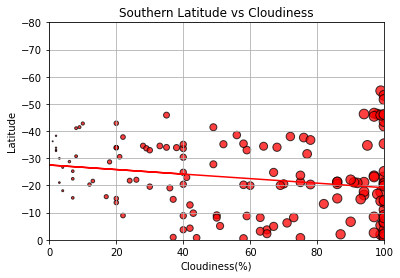

In [105]:
# Add the linear regression equation and line to plot
#northern_cities=city_weather_df.loc[city_weather_df["latitude"]>0, :]
y_axis=southern_cities["latitude"]
x_axis=southern_cities["cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black",
            s=x_axis, alpha=0.75);
            # The y limits of our scatter plot is 0 to 1
plt.ylim(0, -80)

# The x limits of our scatter plot is 0 to 100
plt.xlim(0,100)
#plt.hlines(-60, -20 ,10, alpha=0.25)
# Create a title, x label, and y label for our chart
plt.title("Southern Latitude vs Cloudiness")
plt.xlabel("Cloudiness(%)")
plt.ylabel("Latitude")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.plot(x_axis,regress_values,"r-")
plt.grid()
#Save plot as image file
plt.savefig("Images/SouthernLinearRegressionLatCloud.jpg")
print(line_eq)
plt.show()

Very similar graphs for Linear regression of cloudiness in Northern and Southern latitudes which is not surprising again. The slope of the equation is very similar too. A good predictor of what cloudiness % would be like at different latitudes

####  Northern Hemisphere - Wind Speed (kmph) vs. Latitude Linear Regression

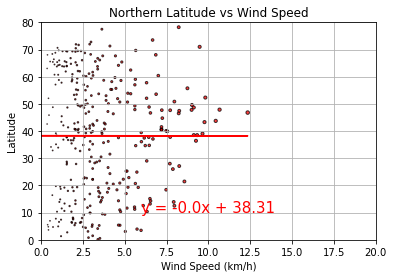

y = -0.0x + 38.31


In [106]:
# Add the linear regression equation and line to plot
#northern_cities=city_weather_df.loc[city_weather_df["latitude"]>0, :]
y_axis=northern_cities["latitude"]
x_axis=northern_cities["wind_speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black",
            s=x_axis, alpha=0.75);
#Latitudes from 0 to 80
plt.ylim(0, 80)

# Wind speed from 0 to 20
plt.xlim(0,20)
#plt.hlines(-60, -20 ,10, alpha=0.25)
# Create a title, x label, and y label for our chart
plt.title("Northern Latitude vs Wind Speed")
plt.xlabel("Wind Speed (km/h)")
plt.ylabel("Latitude")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.plot(x_axis,regress_values,"r-")
plt.grid()
#Save plot as image file
plt.savefig("Images/NorthernLinearRegressionLatWindSpeed.jpg")
plt.show()
print(line_eq)

####  Southern Hemisphere - Wind Speed (kmph) vs. Latitude Linear Regression

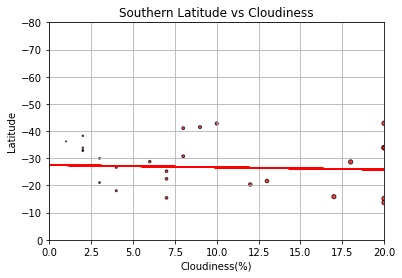

<Figure size 432x288 with 0 Axes>

y = 0.08x + -27.51


In [107]:
# Add the linear regression equation and line to plot
#northern_cities=city_weather_df.loc[city_weather_df["latitude"]>0, :]
y_axis=southern_cities["latitude"]
x_axis=southern_cities["cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black",
            s=x_axis, alpha=0.75);
            # The y limits of our scatter plot is 0 to 1
#Latitudes from 0 to 80
plt.ylim(0, -80)

# Wind speed from 0 to 20
plt.xlim(0,20)
#plt.hlines(-60, -20 ,10, alpha=0.25)
# Create a title, x label, and y label for our chart
plt.title("Southern Latitude vs Cloudiness")
plt.xlabel("Cloudiness(%)")
plt.ylabel("Latitude")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.plot(x_axis,regress_values,"r-")
plt.grid()
plt.show()
#Save plot as image file
plt.savefig("Images/SouthernLinearRegressionLatWindSpeed.jpg")
plt.show()
print(line_eq)

The linear regression lines are rather horizontal and more scatter points in the northern latitudes than southern but that is more to sampling issues I reckon. Other wise its a good predictor of what cloudiness would be like at other latitudes

End of Assigned tasks

Comments: